# IDMP - Final Project -  Data Integration Pipeline for IOT Sensor Data

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_iot_sensor_data(num_samples=5000, time_steps=50, num_features=12, fault_probability=0.2):

    X = np.zeros((num_samples, time_steps, num_features))
    y = np.zeros(num_samples)

    for i in range(num_samples):
        normal_sequence = np.random.normal(loc=0.5, scale=0.1, size=(time_steps, num_features))
        X[i] = normal_sequence
        if np.random.rand() < fault_probability:
            y[i] = 1
            num_faulty_features = np.random.randint(1, num_features // 2 + 1)
            faulty_features = np.random.choice(num_features, num_faulty_features, replace=False)
            for feature in faulty_features:
                anomaly_type = np.random.choice(["spike", "drift"])
                if anomaly_type == "spike":
                    X[i, :, feature] += np.random.normal(loc=2, scale=0.5, size=time_steps)
                elif anomaly_type == "drift":
                    X[i, :, feature] += np.linspace(0, np.random.uniform(1, 2), time_steps)

    return X, y


num_samples = 1000
time_steps = 50
num_features = 5
fault_probability = 0.3

X, y = generate_iot_sensor_data(num_samples, time_steps, num_features, fault_probability)

print(f"Data shape (X): {X.shape}")
print(f"Labels shape (y): {y.shape}")

Data shape (X): (1000, 50, 5)
Labels shape (y): (1000,)


In [6]:
import pandas as pd

def save_to_csv(X, y, filename="iot_sensor_dataset.csv"):

    num_samples, time_steps, num_features = X.shape
    X_flattened = X.reshape(num_samples, time_steps * num_features)

    data = np.hstack((X_flattened, y.reshape(-1, 1)))

    feature_columns = [f"Sensor_{i}_T{j}" for i in range(num_features) for j in range(time_steps)]
    columns = feature_columns + ["Label"]
    df = pd.DataFrame(data, columns=columns)

    # Save to CSV
    df.to_csv(filename, index=False)
    print(f"Dataset saved to {filename}")

save_to_csv(X, y, filename="iot_sensor_dataset.csv")


Dataset saved to iot_sensor_dataset.csv


In [10]:
filename = "iot_sensor_dataset.csv"
data = pd.read_csv(filename)
print(data.shape)
data.info


(1000, 251)


<bound method DataFrame.info of      Sensor_0_T0  Sensor_0_T1  Sensor_0_T2  Sensor_0_T3  Sensor_0_T4  \
0       0.680458     0.553846     0.461571     0.479942     0.659133   
1       0.305672     2.936860     0.403472     2.335451     0.501100   
2       0.598915     0.448058     0.421844     0.474577     0.407388   
3       0.596216     0.495945     0.539999     0.556162     0.410906   
4       0.370144     0.526579     0.472494     0.403984     0.485070   
..           ...          ...          ...          ...          ...   
995     0.525602     0.552106     0.523481     0.377091     0.436922   
996     0.570095     0.512761     0.509997     0.514560     3.242502   
997     0.674040     0.438662     0.607108     0.618548     0.437096   
998     0.482716     0.474018     0.596293     0.403816     0.528541   
999     0.406590     0.607166     0.585514     0.495209     0.277355   

     Sensor_0_T5  Sensor_0_T6  Sensor_0_T7  Sensor_0_T8  Sensor_0_T9  ...  \
0       0.475564     0.364434     0.493955     0.368702     0.423274  ...   
1       0.387854     2.918947     0.480570     2.000338     0.573213  ...   
2       0.480973     0.333243     0.451128     0.433872     0.553953  ...   
3       0.527075     0.623972     0.702948     0.687613     0.588581  ...   
4       0.323730     0.672239     0.350888     0.283333     0.651008  ...   
..           ...          ...          ...          ...          ...  ...   
995     0.506425     0.311938     0.653952     0.595374     0.468384  ...   
996     0.564332     0.540489     0.395362     0.414932     3.285551  ...   
997     0.524916     0.629724     0.455469     0.435846     0.484120  ...   
998     0.365588     0.485409     0.448282     0.542793     0.365984  ...   
999     0.533110     0.769768     0.529338     0.351040     0.326276  ...   

     Sensor_4_T41  Sensor_4_T42  Sensor_4_T43  Sensor_4_T44  Sensor_4_T45  \
0        0.486158      0.642388      0.525600      0.479097      0.474496   
1        2.442911      0.476389      3.711477      0.474435      0.403373   
2        0.624945      0.411265      0.546865      1.853650      2.016150   
3        0.440700      1.679898      0.385881      0.641748      0.589972   
4        0.466435      0.425330      0.632953      0.560095      0.589099   
..            ...           ...           ...           ...           ...   
995      0.528614      0.369595      0.627840      0.466099      0.611454   
996      0.482986      0.383826      0.564834      2.136056      0.427836   
997      0.569814      0.509418      1.620060      0.589642      2.234714   
998      0.479952      0.372562      0.421451      0.615209      0.553402   
999      0.670592      0.366267      0.597107      0.588362      0.436128   

     Sensor_4_T46  Sensor_4_T47  Sensor_4_T48  Sensor_4_T49  Label  
0        0.446088      0.502093      0.480632      0.554555    0.0  
1        2.507585      0.396773      2.128180      0.570751    1.0  
2        0.551455      0.430221      0.335279      1.791653    1.0  
3        0.333375      1.825028      0.592667      0.444578    1.0  
4        0.490109      0.505184      0.527100      0.606548    0.0  
..            ...           ...           ...           ...    ...  
995      0.516527      0.422152      0.590312      0.431984    0.0  
996      0.442336      0.501999      0.500223      2.513382    1.0  
997      0.594576      0.391045      1.808892      0.661330    1.0  
998      0.389381      0.422280      0.308274      0.333521    0.0  
999      0.567576      0.588507      0.490682      0.565893    0.0  

[1000 rows x 251 columns]>

In [11]:
data.describe()

,Sensor_0_T0,Sensor_0_T1,Sensor_0_T2,Sensor_0_T3,Sensor_0_T4,Sensor_0_T5,Sensor_0_T6,Sensor_0_T7,Sensor_0_T8,Sensor_0_T9,...,Sensor_4_T41,Sensor_4_T42,Sensor_4_T43,Sensor_4_T44,Sensor_4_T45,Sensor_4_T46,Sensor_4_T47,Sensor_4_T48,Sensor_4_T49,Label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.565845,0.589016,0.582175,0.581755,0.592240,0.566458,0.592864,0.586338,0.585166,0.591944,...,0.649388,0.636039,0.643891,0.651958,0.657477,0.647701,0.649807,0.651544,0.649181,0.29200
std,0.379252,0.441541,0.411977,0.424525,0.460706,0.408094,0.433466,0.430670,0.422543,0.429474,...,0.504942,0.507635,0.486149,0.521516,0.512310,0.518760,0.526159,0.518527,0.512624,0.45491
min,0.180806,0.194513,0.185983,0.204534,0.216412,0.173811,0.191323,0.176439,0.171031,0.191655,...,0.159992,0.190322,0.207153,0.208154,0.179177,0.231052,0.192652,0.124610,0.201676,0.00000
25%,0.437896,0.437641,0.437767,0.434361,0.433070,0.423936,0.441944,0.430229,0.433279,0.436227,...,0.446563,0.432946,0.443001,0.436465,0.443056,0.442383,0.440620,0.437179,0.437251,0.00000
50%,0.501766,0.510574,0.503733,0.502307,0.504877,0.498076,0.510365,0.496747,0.504912,0.513193,...,0.514712,0.504731,0.510894,0.511521,0.515434,0.506067,0.508814,0.510604,0.508385,0.00000
75%,0.578455,0.577237,0.571815,0.573965,0.577849,0.572293,0.586527,0.582668,0.582094,0.583438,...,0.592536,0.580766,0.598438,0.594074,0.592913,0.579378,0.589771,0.596728,0.594492,1.00000
max,3.468926,3.919789,3.144835,4.026414,4.007534,3.741899,3.842030,3.628995,3.537620,3.821296,...,3.772892,4.278082,3.772608,3.230847,3.210409,4.009076,4.271879,3.500865,3.395109,1.00000


# Preprocessing On the Data

## Standardization of the data

In [12]:
def manual_standardization(data):
    means = data.mean(axis=0)
    std_devs = data.std(axis=0)
    standardized_data = (data - means) / std_devs
    return standardized_data

## Data Reshaping

In [20]:
def reshape_data(features, time_steps=50):
    num_samples = len(features)
    num_features = features.shape[1]
    if num_samples % time_steps != 0:
        raise ValueError("Number of samples must be divisible by time_steps for reshaping.")

    reshaped_data = features.values.reshape(num_samples // time_steps, time_steps, num_features)
    return reshaped_data


## Splitting of the Data for training and testing

In [23]:
def train_test_split_manual(data, labels, test_size=0.2):
    num_samples = len(data)
    indices = np.random.permutation(num_samples)
    split_idx = int(num_samples * (1 - test_size))
    X_train = data[indices[:split_idx]]
    X_test = data[indices[split_idx:]]

    y_train = labels.iloc[indices[:split_idx]]
    y_test = labels.iloc[indices[split_idx:]]

    return X_train, X_test, y_train, y_test

## Class Weight Computation

In [22]:
def compute_class_weights(labels):
    class_counts = labels.value_counts()
    total_samples = len(labels)
    class_weights = {cls: total_samples / (len(class_counts) * count) for cls, count in class_counts.items()}
    return class_weights

## Data Preprocessing Pipeline

In [24]:
def preprocess_data(data, time_steps=50):
    labels = data["Label"]
    features = data.drop(columns=["Label"])
    standardized_features = manual_standardization(features)
    reshaped_data = reshape_data(standardized_features, time_steps)
    X_train, X_test, y_train, y_test = train_test_split_manual(reshaped_data, labels)
    class_weights = compute_class_weights(y_train)
    return X_train, X_test, y_train, y_test, class_weights

X_train, X_test, y_train, y_test, class_weights = preprocess_data(data)

print(f"Train data shape: {X_train.shape}, Test data shape: {X_test.shape}")
print(f"Class weights: {class_weights}")



Train data shape: (16, 50, 250), Test data shape: (4, 50, 250)
Class weights: {0.0: 0.8, 1.0: 1.3333333333333333}


# Data Visualization

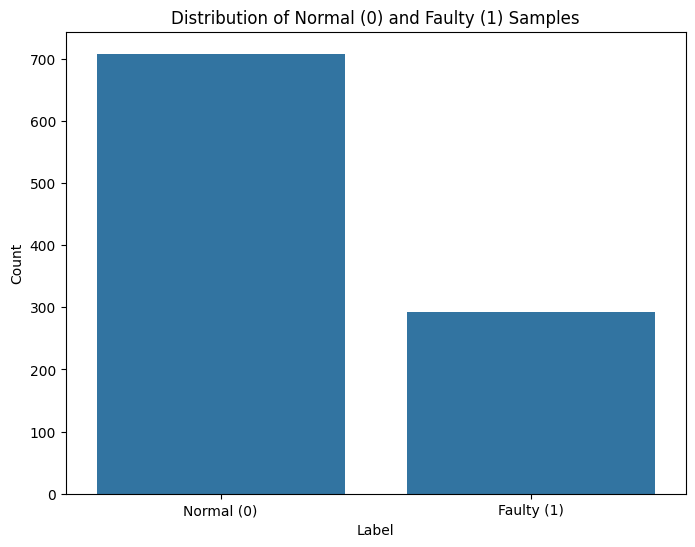

In [27]:
# Plot for understanding distribution of Noraml and Faulty Sample

plt.figure(figsize=(8, 6))
sns.countplot(x=data['Label'])
plt.title("Distribution of Normal (0) and Faulty (1) Samples")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks([0, 1], ['Normal (0)', 'Faulty (1)'])
plt.show()


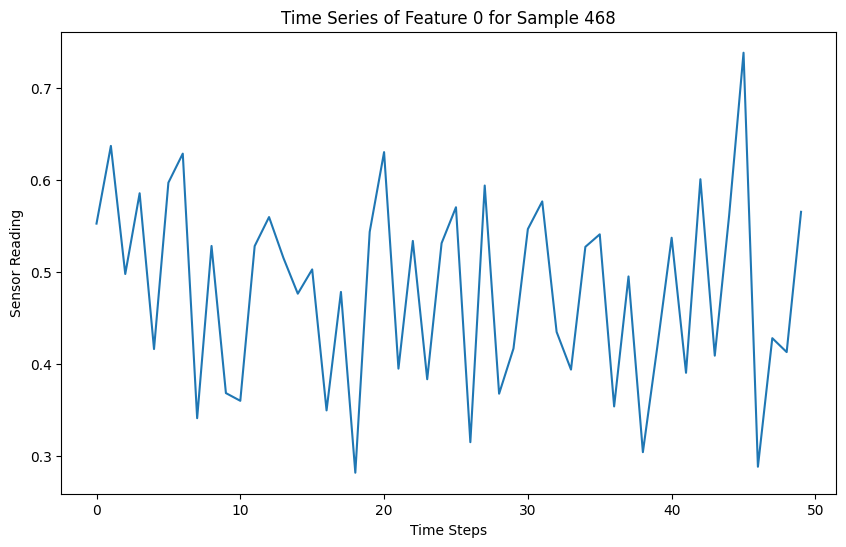

In [28]:
# For visualizing how a single feature behaves over time,

random_sample_idx = np.random.randint(0, len(data))
feature_idx = 0
time_steps = 50

plt.figure(figsize=(10, 6))
plt.plot(data.iloc[random_sample_idx, 1:time_steps+1].values)
plt.title(f"Time Series of Feature {feature_idx} for Sample {random_sample_idx}")
plt.xlabel("Time Steps")
plt.ylabel("Sensor Reading")
plt.show()

# LSTM Model for Classification

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping


In [42]:
def create_improved_lstm_model(input_shape):
    model = Sequential()


    model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=input_shape))
    model.add(Dropout(0.3))


    model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
    model.add(Dropout(0.3))

    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.3))

    model.add(Dense(units=1, activation='sigmoid'))

    return model

In [43]:
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_improved_lstm_model(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional)      │ (None, 50, 200)             │         280,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 50, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 50, 200)             │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 50, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 50)                  │          50,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,715,555 (6.54 MB)

 Trainable params: 571,851 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,143,704 (4.36 MB)

In [44]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5000 - loss: 0.7053 - val_accuracy: 0.5000 - val_loss: 0.6471
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8125 - loss: 0.6116 - val_accuracy: 0.5000 - val_loss: 0.6292
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.7500 - loss: 0.5441 - val_accuracy: 0.5000 - val_loss: 0.6145
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step - accuracy: 0.8125 - loss: 0.4679 - val_accuracy: 0.7500 - val_loss: 0.5921
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.8750 - loss: 0.3920 - val_accuracy: 0.7500 - val_loss: 0.5831
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.8750 - loss: 0.3225 - val_accuracy: 0.7500 - val_loss: 0.6048
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 1.0000 - loss: 0.2903 - val_accuracy: 0.7500 - val_loss: 0.6363
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 1.0000 - loss: 0.2242 - val_accuracy: 0.7500 - val_loss: 0.643

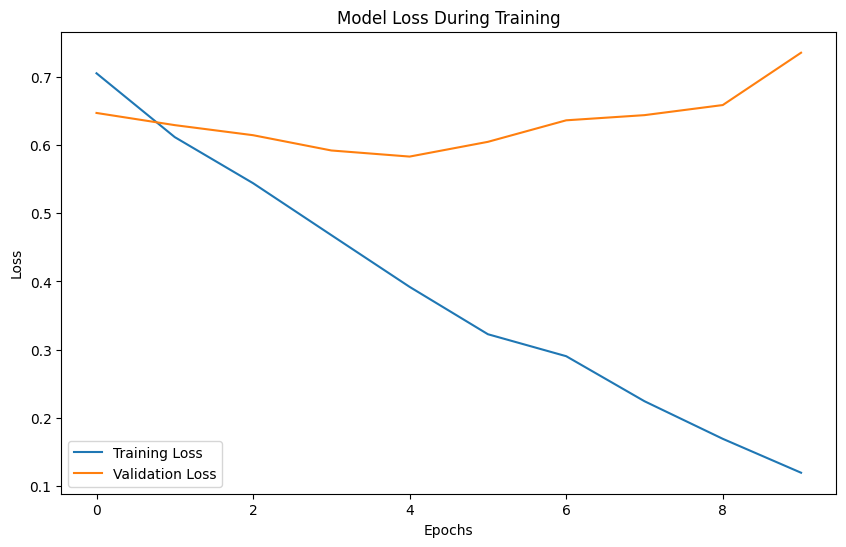

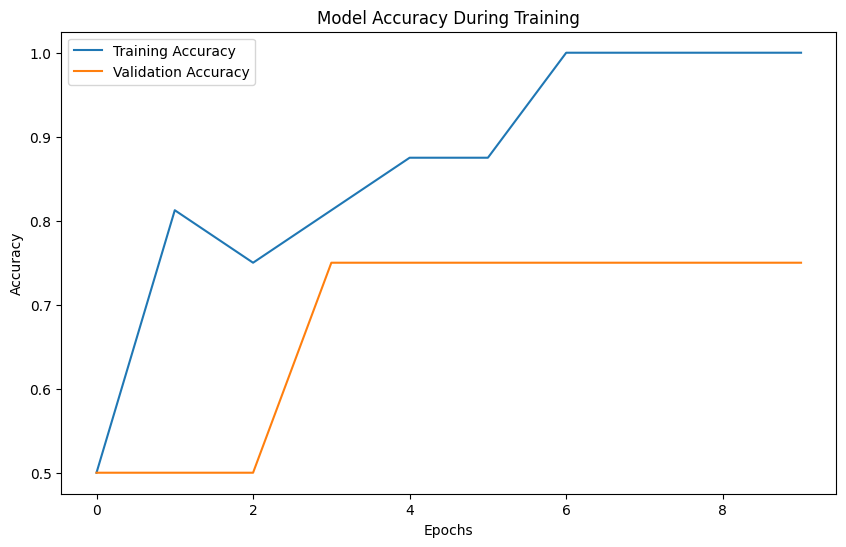

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss During Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy During Training")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [47]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7500 - loss: 0.5831
Test Accuracy: 75.00%
